# Filter-Based Feature Selection Methods (Regression)

Having irrelevant features in the data can lower the accuracy of the machine learning models. 

Feature selection is when you choose the features that contribute the most to your prediction variable or output.

In this notebook we will study a regression problem with several numerical predictors.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt
import seaborn as sns

## Automobile Dataset

We will use the Automobile Data Set [https://archive.ics.uci.edu/ml/datasets/automobile] from the UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]. It includes categorical and continuous variables. 

In [2]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", 
           "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", 
           "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,...,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,...,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,...,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,...,115.0,5500.0,18,22,17450.0


### Missing Values Analysis

In [4]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [5]:
# Removing the missing values
df.dropna(inplace=True)
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

There are categorical (object) and numerical (float and int) variables in the dataset.

In [6]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Getting the numerical variables

In [7]:
# Getting the numerical variables
var_num = [col for col in df.columns if (df[col].dtype == "float64" or df[col].dtype == "int64")]
var_num

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [8]:
Xnum = df[var_num]

In [9]:
# removing price (the dependent variable)
del(Xnum['price'])
Xnum.head(3)

,symboling,normalized_losses,wheel_base,length,width,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
3,2,164.0,99.8,176.6,66.2,...,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,...,8.0,115.0,5500.0,18,22
6,1,158.0,105.8,192.7,71.4,...,8.5,110.0,5500.0,19,25


In [10]:
# price is the dependent variable
y = df.price

## The `scikit-learn` library

The scikit-learn library provides many different filtering methods once statistics have been calculated for each input variable with the target.

One of them is:
- `SelectFwe`: Select the p-values corresponding to Family-wise error rate.
- `SelectFpr`: Select the p-values below alpha based on a FPR test.
- `SelectPercentile`: Select features according to a percentile of the highest scores.
- `SelectKBest`: Select the top k variables 

In [11]:
from sklearn.feature_selection import SelectFwe, SelectFpr, SelectPercentile, SelectKBest

## Working with numerical variables

In [12]:
Xnum.head(3)

,symboling,normalized_losses,wheel_base,length,width,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
3,2,164.0,99.8,176.6,66.2,...,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,...,8.0,115.0,5500.0,18,22
6,1,158.0,105.8,192.7,71.4,...,8.5,110.0,5500.0,19,25


### Correlation Analysis

Let us calculate the correlation matrix for numerical variables.

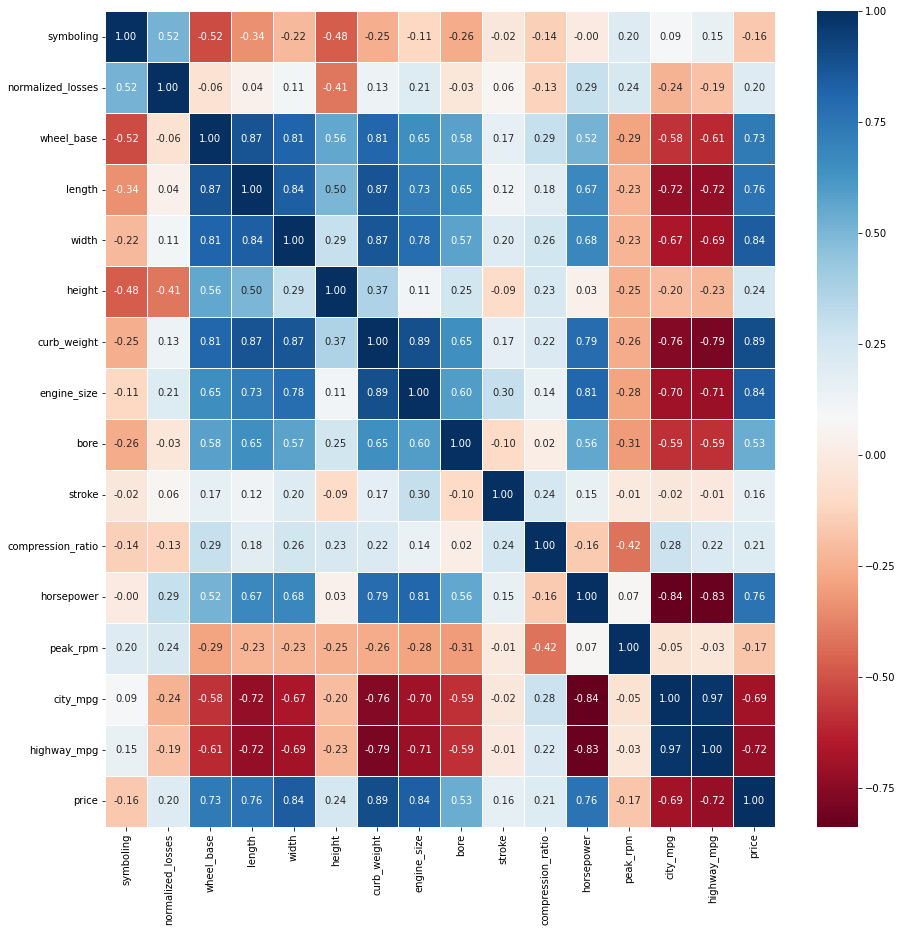

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df[var_num].corr(), annot=True, fmt='.2f', cmap='RdBu', linewidth=0.5, ax=ax);

The last row shows the correlation between `price` and all numerical variables.

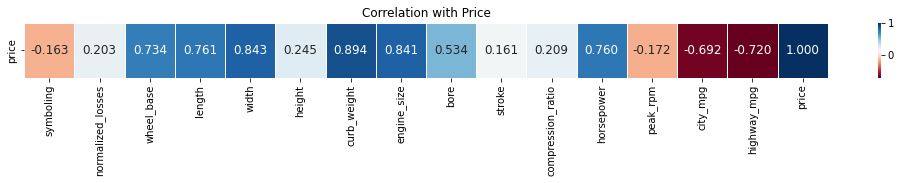

In [14]:
fig, ax = plt.subplots(figsize=(18,1))
sns.heatmap(df[var_num].corr().tail(1), annot=True, fmt='.3f', annot_kws={"size": 12},
            cmap='RdBu', linewidth=0.5, ax=ax).set_title('Correlation with Price');

Let us calculate the signification of the Pearson Correlation Coefficient.

In [15]:
from scipy.stats import pearsonr

In [16]:
pValueCorr = [pearsonr(Xnum[col], y)[1] for col in Xnum.columns]
pValDf = pd.DataFrame([pValueCorr], columns=Xnum.columns, index=['price'])

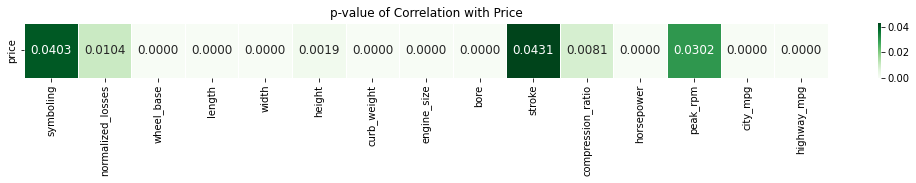

In [17]:
# Plotting the correlation p-value
fig, ax = plt.subplots(figsize=(18,1))
sns.heatmap(pValDf, annot=True, fmt='.4f', annot_kws={"size": 12},
            cmap='Greens', linewidth=0.5, ax=ax).set_title('p-value of Correlation with Price');

### SelectFwe: f_regression

Correlation measures the linear relationship between two variables. Pearson is the most common correlation coefficient. The scikit-learn library offers an implementation of the correlation statistic in the `f_regression` function.

`SelectFwe`: Selects features based on family-wise error rate. The family-wise error rate is the probability of making one or more false discoveries or type I errors when performing multiple hypotheses tests.

In [18]:
from sklearn.feature_selection import f_regression

In [19]:
# SelectFwe: f_regress
sel_fwe = SelectFwe(score_func=f_regression)

In [20]:
Xnum_fwe = pd.DataFrame(sel_fwe.fit_transform(Xnum, y), columns=sel_fwe.get_feature_names_out())
print(Xnum_fwe.shape)
Xnum_fwe.head(3)

(159, 10)


,wheel_base,length,width,height,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,102.0,24.0,30.0
1,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,115.0,18.0,22.0
2,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,110.0,19.0,25.0


Notice that the features selected are those with fewer p-values. Check the last heatmap: 'p-value of Correlation with Price.'

In [21]:
# alpha=0.05 is the default
sel_fwe = SelectFwe(score_func=f_regression, alpha=0.05)

In [22]:
Xnum_fwe = pd.DataFrame(sel_fwe.fit_transform(Xnum, y), columns=sel_fwe.get_feature_names_out())
print(Xnum_fwe.shape)
Xnum_fwe.head(3)

(159, 10)


,wheel_base,length,width,height,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,102.0,24.0,30.0
1,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,115.0,18.0,22.0
2,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,110.0,19.0,25.0


Let us change to `alpha=0.01`

In [23]:
# alpha=0.01
sel_fwe_1 = SelectFwe(score_func=f_regression, alpha=0.01)

In [24]:
Xnum_fwe_1 = pd.DataFrame(sel_fwe_1.fit_transform(Xnum, y), columns=sel_fwe_1.get_feature_names_out())
print(Xnum_fwe_1.shape)
Xnum_fwe_1.head(3)

(159, 9)


,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0
1,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0
2,105.8,192.7,71.4,2844.0,136.0,3.19,110.0,19.0,25.0


The results are pretty similar. The variable `height` is not selected now.

### SelectFpr: f_regression

`SelectFpr`: Selects the pvalues below alpha based on a FPR test.

FPR test stands for False Positive Rate test. It controls the total amount of false detections.

In [25]:
# Choosing the features with correlation above 0.01
sel_fpr = SelectFpr(score_func=f_regression, alpha=0.01)

In [26]:
Xnum_fpr = pd.DataFrame(sel_fpr.fit_transform(Xnum, y), columns=sel_fpr.get_feature_names_out())
print(Xnum_fpr.shape)
Xnum_fpr.head(3)

(159, 11)


,wheel_base,length,width,height,curb_weight,...,bore,compression_ratio,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,54.3,2337.0,...,3.19,10.0,102.0,24.0,30.0
1,99.4,176.6,66.4,54.3,2824.0,...,3.19,8.0,115.0,18.0,22.0
2,105.8,192.7,71.4,55.7,2844.0,...,3.19,8.5,110.0,19.0,25.0


Notice the selected variables are those with pvalues > alpha. Check the last heatmap: 'p-value of Correlation with Price.'

### SelectPercentile: f_regression

`SelectPercentile`: Selects features according to a percentile of the highest scores.

In [27]:
sel_p10 = SelectPercentile(score_func=f_regression, percentile=10)

In [28]:
Xnum_p10 = pd.DataFrame(sel_p10.fit_transform(Xnum, y), columns=sel_p10.get_feature_names_out())
print(Xnum_p10.shape)
Xnum_p10.head(3)

(159, 2)


,width,curb_weight
0,66.2,2337.0
1,66.4,2824.0
2,71.4,2844.0


Notice that `width` and `curb_weight` are the variables with highest correlation values with `price`. Check the heatmap 'Correlation with Price'.

In [29]:
sel_p50 = SelectPercentile(score_func=f_regression, percentile=50)

In [30]:
Xnum_p50 = pd.DataFrame(sel_p50.fit_transform(Xnum, y), columns=sel_p50.get_feature_names_out())
print(Xnum_p50.shape)
Xnum_p50.head(3)

(159, 7)


,wheel_base,length,width,curb_weight,engine_size,horsepower,highway_mpg
0,99.8,176.6,66.2,2337.0,109.0,102.0,30.0
1,99.4,176.6,66.4,2824.0,136.0,115.0,22.0
2,105.8,192.7,71.4,2844.0,136.0,110.0,25.0


### SelectKBest: f_regression

Select features according to the `k` highest scores.

In [31]:
# SelectKBest: f_regression
from sklearn.feature_selection import f_regression

In [32]:
# SelectKBest with k = 8
sel_f8 = SelectKBest(score_func=f_regression, k=8)

In [33]:
Xnumf8 = pd.DataFrame(sel_f8.fit_transform(Xnum, y), columns=sel_f8.get_feature_names_out())
Xnumf8.head(3)

,wheel_base,length,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,2337.0,109.0,102.0,24.0,30.0
1,99.4,176.6,66.4,2824.0,136.0,115.0,18.0,22.0
2,105.8,192.7,71.4,2844.0,136.0,110.0,19.0,25.0


In [34]:
# Choosing k = 4
sel_f4 = SelectKBest(score_func=f_regression, k=4)

In [35]:
Xnumf4 = pd.DataFrame(sel_f4.fit_transform(Xnum, y), columns=sel_f4.get_feature_names_out())
Xnumf4.head(3)

,length,width,curb_weight,engine_size
0,176.6,66.2,2337.0,109.0
1,176.6,66.4,2824.0,136.0
2,192.7,71.4,2844.0,136.0


### SelectKBest: mutual_info_regression

`mutual_info_regression`: mutual information for a continuous target.

In [36]:
# SelectKBest: mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

In [37]:
# Choosing k = 8
sel_m8 = SelectKBest(score_func=mutual_info_regression, k=8)

In [38]:
Xnumm8 = pd.DataFrame(sel_m8.fit_transform(Xnum, y), columns=sel_m8.get_feature_names_out())
Xnumm8.head(3)

,wheel_base,length,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg
0,99.8,176.6,66.2,2337.0,109.0,102.0,24.0,30.0
1,99.4,176.6,66.4,2824.0,136.0,115.0,18.0,22.0
2,105.8,192.7,71.4,2844.0,136.0,110.0,19.0,25.0


In [39]:
# Choosing k = 4
sel_m4 = SelectKBest(score_func=mutual_info_regression, k=4)

In [40]:
Xnumm4 = pd.DataFrame(sel_m4.fit_transform(Xnum, y), columns=sel_m4.get_feature_names_out())
Xnumm4.head(3)

,curb_weight,engine_size,horsepower,highway_mpg
0,2337.0,109.0,102.0,30.0
1,2824.0,136.0,115.0,22.0
2,2844.0,136.0,110.0,25.0


References:

- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection